In [121]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [119]:
def load_data(filename):
    with open(filename, 'rb') as f:
        data = pickle.load(f)
    return data

def norm_data(freq_dict):
    surface_sum = sum(freq_dict['surface'].values())
    core_sum = sum(freq_dict['core'].values())
    
    for key in freq_dict['surface'].keys():
        freq_dict['surface'][key] = freq_dict['surface'][key] / surface_sum
    for key in freq_dict['core'].keys():
        freq_dict['core'][key] = freq_dict['core'][key] / core_sum
    return freq_dict

ecoli = norm_data(load_data('./data/aa_freq_ecoli.pkl'))
thermo = norm_data(load_data('./data/aa_freq_thermo.pkl'))

ecoli_mpnn_design = norm_data(load_data('./data/aa_freq_mpnn_ecoli_with_python_MPNN.pkl'))
thermo_mpnn_design = norm_data(load_data('./data/aa_freq_mpnn_thermo_with_python_MPNN.pkl'))

ecoli_hyper_design = norm_data(load_data('./data/aa_freq_mpnn_tuned_ecoli.pkl'))
thermo_hyper_desgin = norm_data(load_data('./data/aa_freq_mpnn_tuned_thermo_with_python_MPNN.pkl'))

In [120]:
df_surface = pd.DataFrame({
    'E. coli': ecoli['surface'],
    'Thermo': thermo['surface'],
    'E. coli MPNN': ecoli_mpnn_design['surface'],
    'Thermo MPNN': thermo_mpnn_design['surface'],
    'E. coli Hyper': ecoli_hyper_design['surface'],
    'Thermo Hyper': thermo_hyper_desgin['surface']
})
df_core = pd.DataFrame({
    'E. coli': ecoli['core'],
    'Thermo': thermo['core'],
    'E. coli MPNN': ecoli_mpnn_design['core'],
    'Thermo MPNN': thermo_mpnn_design['core'],
    'E. coli Hyper': ecoli_hyper_design['core'],
    'Thermo Hyper': thermo_hyper_desgin['core']
})

In [72]:
# df_surface['ecoli_thermo_diff'] = df_surface['Thermo'] - df_surface['E. coli']
# df_surface['ecoli_mpnn_diff'] = df_surface['E. coli MPNN'] - df_surface['E. coli']
# df_surface['ecoli_hyper_diff'] = df_surface['E. coli Hyper'] - df_surface['E. coli']
# df_surface['thermo_ecoli_diff'] = df_surface['E. coli'] - df_surface['Thermo']
# df_surface['hyper_mpnn_diff'] = df_surface['Thermo MPNN'] - df_surface['Thermo']
# df_surface['hyper_hyper_diff'] = df_surface['Thermo Hyper'] - df_surface['Thermo']

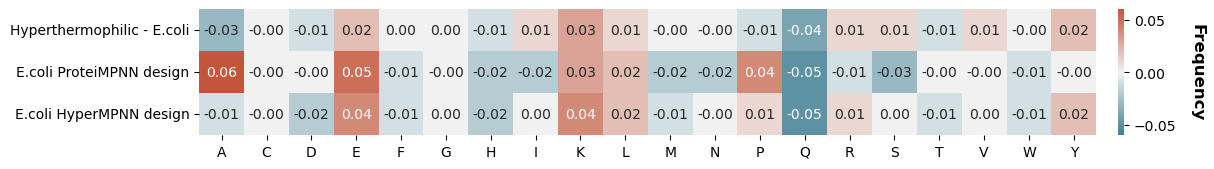

In [84]:
# cmap = sns.diverging_palette(220, 20, as_cmap=True)
# interest_cols = ['ecoli_thermo_diff', 'ecoli_mpnn_diff', 'ecoli_hyper_diff']
# df_tmp = df_surface[interest_cols].copy()
# df_tmp.sort_index(inplace=True)
# df_tmp = df_tmp.round(2)

# fig, ax = plt.subplots(1, 1, figsize=(13, 1.8))
# sns.heatmap(df_tmp.T, ax=ax, cmap=cmap, annot=True, fmt=".2f", cbar_kws={'pad': 0.02}, center=0, vmin=-0.06, vmax=0.06)
# ax.set_yticklabels(ax.get_yticklabels(), rotation=0);
# ax.set_yticklabels(['Hyperthermophilic - E.coli', 'E.coli ProteiMPNN design', 'E.coli HyperMPNN design'], rotation=0);

# cbar = ax.collections[0].colorbar
# cbar.set_label('Frequency', rotation=270, labelpad=20, fontsize=12, fontweight='bold')

# plt.tight_layout()

## Barplot

In [169]:
colors = ['#7ecaf1ff', '#f17e7eff', '#99f4aaff', '#f5f879ff', '#e6e6e6ff']
classifications = {
    'positively_charged': ['R', 'K'],
    'negatively_charged': ['D', 'E'],
    'polar': ['N', 'Q', 'S', 'T'],
    'apolar': ['I', 'L', 'M', 'F', 'W', 'Y', 'V'],
    'others': ['A', 'C', 'G', 'H', 'P']
}
# interest_cols = ['E. coli', 'Thermo', 'E. coli MPNN', 'Thermo MPNN', 'E. coli Hyper', 'Thermo Hyper']
interest_cols = ['E. coli', 'Thermo', 'E. coli MPNN', 'E. coli Hyper' ]

df_surface_class = df_surface[interest_cols].sort_index().copy()
df_surface_melt = pd.melt(df_surface_class.T.reset_index(), id_vars='index')
df_surface_melt.head()

df_core_class = df_core[interest_cols].sort_index().copy()
df_core_melt = pd.melt(df_core_class.T.reset_index(), id_vars='index')
df_core_melt.head()

,index,variable,value
0,E. coli,A,0.129339
1,Thermo,A,0.116296
2,E. coli MPNN,A,0.156566
3,E. coli Hyper,A,0.143731
4,E. coli,C,0.019852


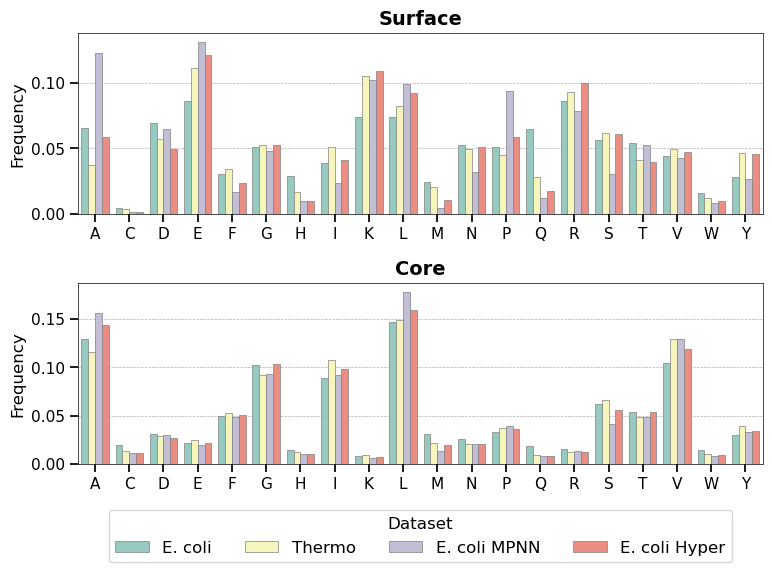

In [273]:
sns.set_context('notebook')
colors = ["#d4e09b","#f6f4d2","#cbdfbd","#f19c79"]
pal = sns.color_palette('Set3', n_colors=4)


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))
barplot1 = sns.barplot(x='variable', y='value', hue='index', data=df_surface_melt, palette=pal, ax=ax1, zorder=2, linewidth=0.5, edgecolor='grey')
ax1.set_xlabel('')

barplot2 = sns.barplot(x='variable', y='value', hue='index', data=df_core_melt, palette=pal, ax=ax2, zorder=2, linewidth=0.5, edgecolor='grey')
ax1.set_xlabel('')
ax2.set_xlabel('')
ax1.set_ylabel('Frequency')
ax2.set_ylabel('Frequency')

ax1.set_title('Surface', fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax2.set_title('Core', fontdict={'fontsize': 14, 'fontweight': 'bold'})

# ax1.set_xticks(list(range(0, 20,)))


ax1.legend_.remove()
sns.move_legend(barplot2, "center", bbox_to_anchor=(0.5, -0.4), ncol=4, title='Dataset', fontsize=12)

ax1.grid(axis='y', linestyle='--', linewidth=0.5, zorder=0)
ax2.grid(axis='y', linestyle='--', linewidth=0.5, zorder=0)

plt.setp(ax1.spines.values(), lw=0.5)
plt.setp(ax2.spines.values(), lw=0.5)
plt.tight_layout()

In [ ]:
os.system('mkdir -p ./figures')